<a href="https://colab.research.google.com/github/sayanbanerjee32/TSAI_ERAv2_S7/blob/main/step0/S7_step0_SayanBanerjee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Target:

- Complete initial set-up
 - Set Transforms
 - Set Data Loader
 - Set Basic Working Code
 - Set Basic Training and Test Loop

- Create the basic skeleton.

## Results:

- Parameters: 189984
- Best Training Accuracy: 99.20%
- Best Test Accuracy: 99.02%

## Analysis:

- A Basic skeleton is created that can train and test the model
- Model is suffering from overfitting, specially towards later epochs, Adding regularisation and batch normalisation might help
- Model is too large with respected to required number of parameters. However, there is enough room available for test accuracy to reach 99.4% if training accuracy can be improved further.

# Import all required packages including local files

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

#import from local modules
from model_0 import Net
from utils import train, test, get_device, plot_accuracy_losses

# Check if GPU available

In [2]:
# CUDA? - call get_device function defined in utils.py
is_cuda, device = get_device()

CUDA Available? True


# Train and Test transformations

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Dataset and Creating Train/Test Split

In [4]:
train_data = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 173726526.93it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25588443.98it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41872367.17it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4573956.49it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders

In [5]:
# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if is_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Data Visualization

torch.Size([128, 1, 28, 28])
torch.Size([128])


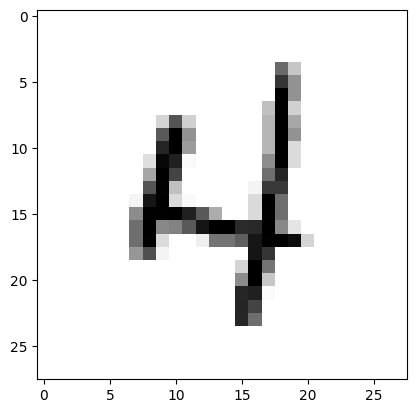

In [6]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

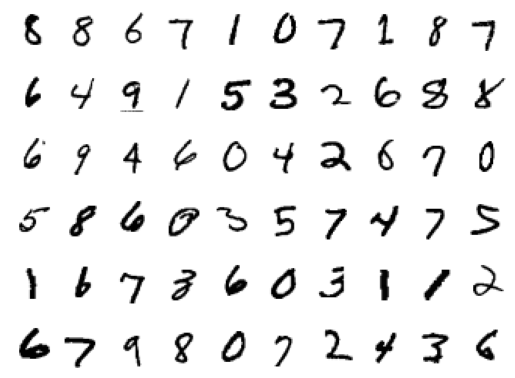

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Training

In [9]:
# visualise model parameters
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
         MaxPool2d-7          [-1, 128, 11, 11]               0
            Conv2d-8           [-1, 32, 11, 11]           4,096
              ReLU-9           [-1, 32, 11, 11]               0
           Conv2d-10             [-1, 64, 9, 9]          18,432
             ReLU-11             [-1, 64, 9, 9]               0
           Conv2d-12            [-1, 128, 7, 7]          73,728
             ReLU-13            [-1, 128, 7, 7]               0
AdaptiveAvgPool2d-14            [-1, 12

In [10]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  # call train function from utils.py
  trn_acc, trn_loss = train(model, device, train_loader, optimizer, criterion)
  # accumulate train accuracies and test losses for visualisation
  train_acc.append(trn_acc)
  train_losses.append(trn_loss)

  # call test function from utils.py
  tst_acc, tst_loss = test(model, device, test_loader, criterion)
  # accumulate test accuracies and test losses for visualisation
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)

Epoch 1


Train: Loss=0.3464 Batch_id=468 Accuracy=29.49: 100%|██████████| 469/469 [00:16<00:00, 28.78it/s]


Test set: Average loss: 0.4104, Accuracy: 8738/10000 (87.38%)

Epoch 2


Train: Loss=0.0463 Batch_id=468 Accuracy=93.10: 100%|██████████| 469/469 [00:16<00:00, 28.50it/s]


Test set: Average loss: 0.1283, Accuracy: 9582/10000 (95.82%)

Epoch 3


Train: Loss=0.0576 Batch_id=468 Accuracy=96.56: 100%|██████████| 469/469 [00:17<00:00, 27.43it/s]


Test set: Average loss: 0.0716, Accuracy: 9776/10000 (97.76%)

Epoch 4


Train: Loss=0.0273 Batch_id=468 Accuracy=97.53: 100%|██████████| 469/469 [00:16<00:00, 28.06it/s]


Test set: Average loss: 0.0640, Accuracy: 9795/10000 (97.95%)

Epoch 5


Train: Loss=0.0307 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:17<00:00, 26.16it/s]


Test set: Average loss: 0.0465, Accuracy: 9858/10000 (98.58%)

Epoch 6


Train: Loss=0.0518 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:20<00:00, 22.35it/s]


Test set: Average loss: 0.0424, Accuracy: 9860/10000 (98.60%)

Epoch 7


Train: Loss=0.0448 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:17<00:00, 27.44it/s]


Test set: Average loss: 0.0454, Accuracy: 9864/10000 (98.64%)

Epoch 8


Train: Loss=0.0246 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:16<00:00, 27.61it/s]


Test set: Average loss: 0.0378, Accuracy: 9876/10000 (98.76%)

Epoch 9


Train: Loss=0.0371 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:16<00:00, 28.28it/s]


Test set: Average loss: 0.0480, Accuracy: 9838/10000 (98.38%)

Epoch 10


Train: Loss=0.0584 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:16<00:00, 28.23it/s]


Test set: Average loss: 0.0390, Accuracy: 9875/10000 (98.75%)

Epoch 11


Train: Loss=0.0451 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:16<00:00, 27.62it/s]


Test set: Average loss: 0.0329, Accuracy: 9890/10000 (98.90%)

Epoch 12


Train: Loss=0.0410 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:17<00:00, 27.23it/s]


Test set: Average loss: 0.0379, Accuracy: 9880/10000 (98.80%)

Epoch 13


Train: Loss=0.1169 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:16<00:00, 28.06it/s]


Test set: Average loss: 0.0425, Accuracy: 9850/10000 (98.50%)

Epoch 14


Train: Loss=0.0064 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:16<00:00, 29.08it/s]


Test set: Average loss: 0.0354, Accuracy: 9883/10000 (98.83%)

Epoch 15


Train: Loss=0.0130 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:16<00:00, 29.25it/s]


Test set: Average loss: 0.0302, Accuracy: 9902/10000 (99.02%)



## Visualise training and test losses and accuracies

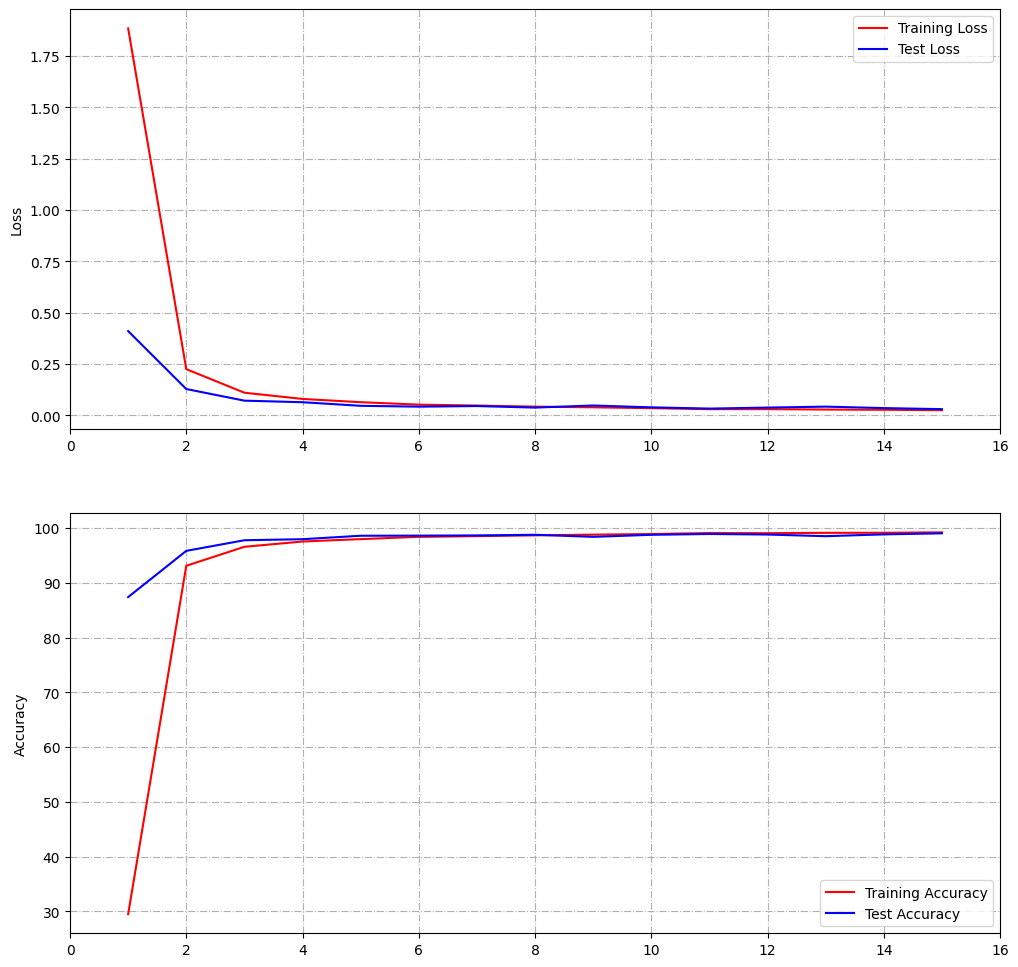

In [12]:
## use function from utils.py
plot_accuracy_losses(train_losses, train_acc, test_losses, test_acc, num_epochs)